# Bias stability CAF (OD level)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_name = "data/forecast-od-accuracy_2020-12-07T18:02_1607364141.parquet"

In [3]:
df = pd.read_parquet(file_name)

In [4]:
date_of_change = pd.Timestamp("2020-11-01")

## Horizon 7

Not lets us start with looking at the horizon 7 days.

In [5]:
import plotly.express as px

def plot_bias_over_time_for_horizon(df, horizon, metric="perc_bias"):
    if metric == "perc_bias":
        func = lambda x: 100 * (x["ffe_total"] - x["ffe"]).sum() / x.dropna(subset=["ffe_total"])["ffe"].sum()
    else:
        metric = "bias"
        func = lambda x: (x["ffe_total"] - x["ffe"]).sum()
    bias = df.query(f"horizon_days == {horizon}").groupby("etd_week_sunday").apply(func)
    
    plt.rcParams['figure.figsize'] = [15, 7]
    
    fig = bias.plot(label=metric)
    
    plt.axvline(date_of_change + pd.Timedelta(days=horizon), color="red")

    # Add rolling mean to show the stability
    rol_mean = bias.rolling(7).mean()
    rol_mean.plot(label="rolling 7 week mean")
    plt.ylabel(metric)
    plt.title("Bias over time")
    plt.legend()
    plt.grid()
    
    return fig

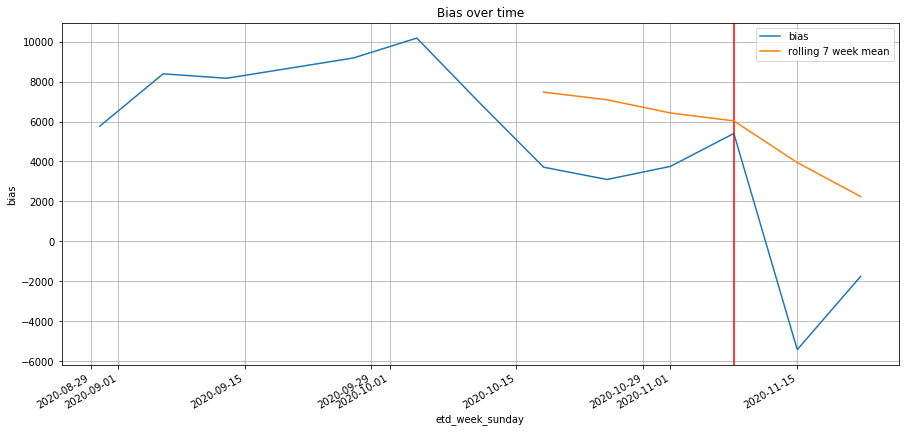

In [6]:
plot_bias_over_time_for_horizon(df, horizon=7, metric="bias");

Not let us try and see how the bias looks for big and small dfus.

In [7]:
df["type"] = np.where(df["ffe_total"] > 5, 'big', 'small')

In [8]:
def plot_types(df, horizon, metric):
    if metric == "perc_bias":
        func = lambda x: pd.Series({"y": 100 * (x["ffe_total"] - x["ffe"]).sum() / x.dropna(subset=["ffe_total"])["ffe"].sum()})
    else:
        metric = "bias"
        func = lambda x: pd.Series({"y": (x["ffe_total"] - x["ffe"]).sum()})
    bias = df.query(f"horizon_days == {horizon}").groupby(["type", "etd_week_sunday"]).apply(func).reset_index()

    plt.rcParams['figure.figsize'] = [15, 7]
    
    fig = bias.pivot(index='etd_week_sunday', columns='type', values='y').plot(label=metric)
        
    plt.axvline(date_of_change + pd.Timedelta(days=horizon), color="red")

    plt.ylabel(metric)
    plt.title("Bias over time")
    plt.legend()
    plt.grid()
    
    return fig

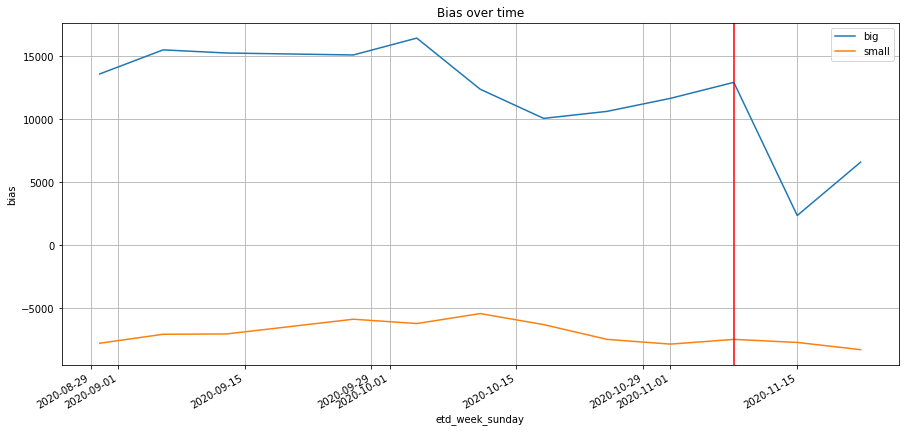

In [9]:
plot_types(df, horizon=7, metric="bias");

So it seems that we are consistently **under-estimating** on the small DFUs.
We are basically always over-estimating the big DFUs, however it seems that it actually got quite a bit better after the data/feature fix.

## Horizon 14

Now lets us do the same for the horizon 14

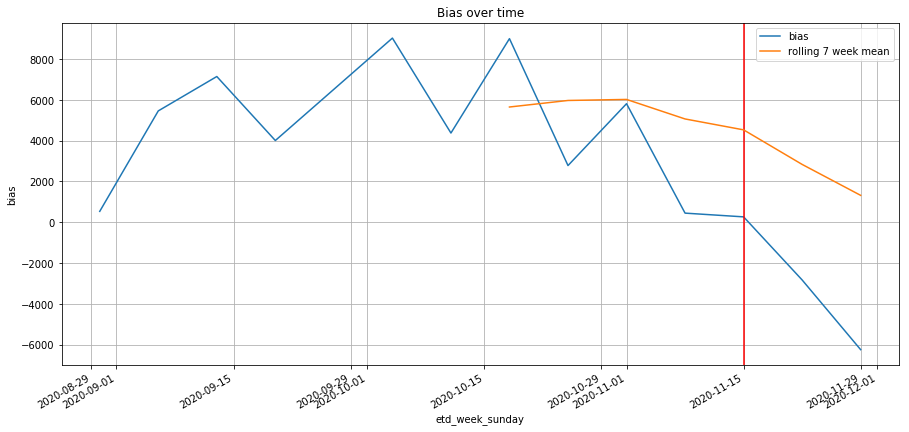

In [10]:
plot_bias_over_time_for_horizon(df, horizon=14, metric="bias");

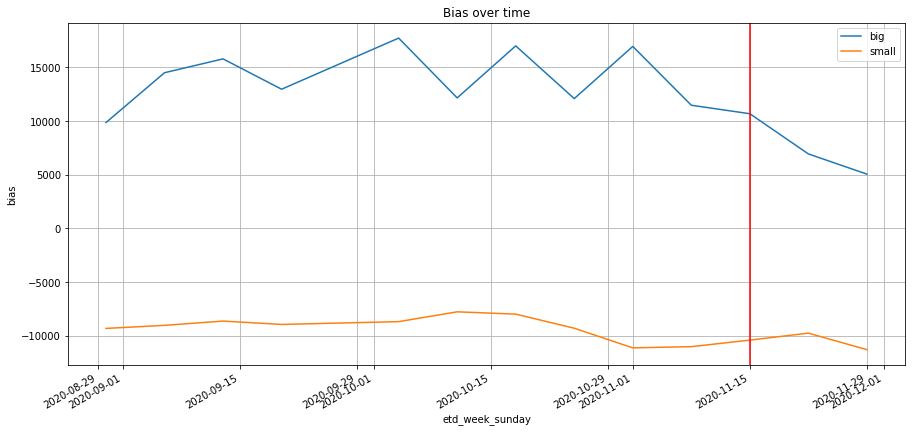

In [11]:
plot_types(df, horizon=14, metric="bias");

## Horizon 21

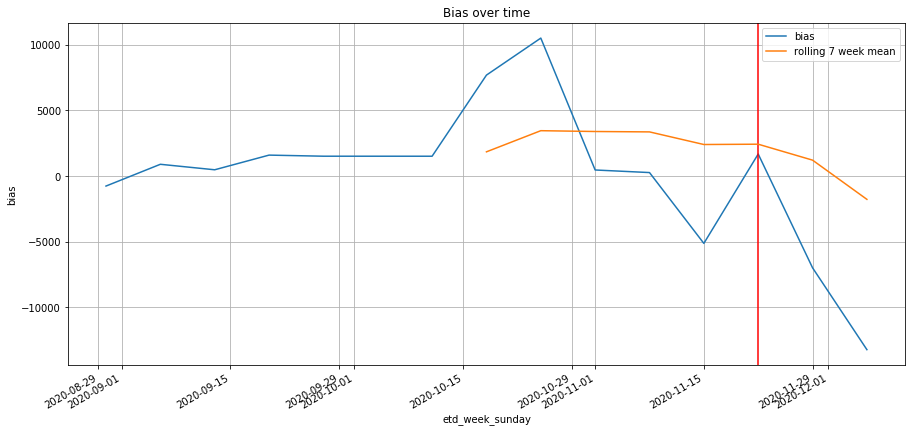

In [12]:
plot_bias_over_time_for_horizon(df, horizon=21, metric="bias");

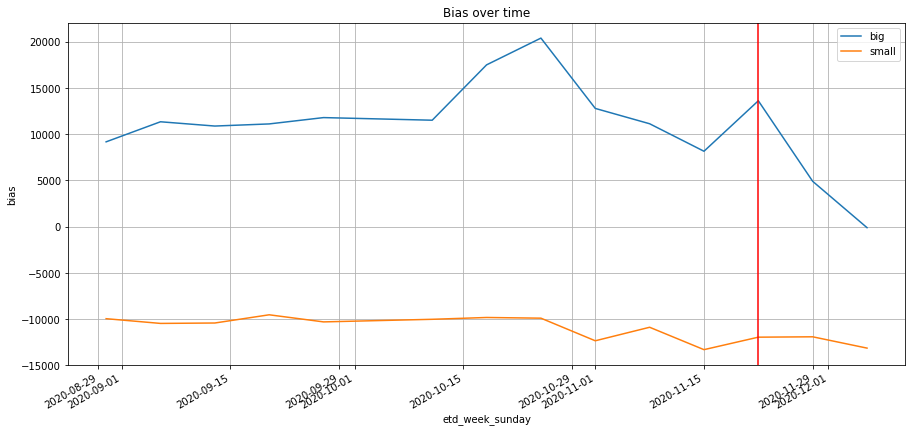

In [13]:
plot_types(df, horizon=21, metric="bias");